In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()

In [2]:
X = iris.data
y = iris.target

X = X[y<2, :2]
y = y[y<2]

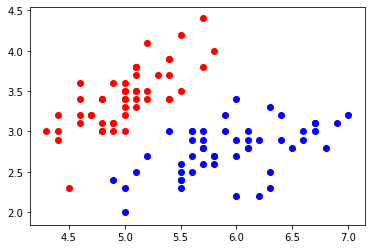

In [3]:
plt.scatter(X[y==0, 0], X[y==0, 1], color='r')
plt.scatter(X[y==1, 0], X[y==1, 1], color='b')
plt.show()

In [4]:
import sys
sys.path.append("/Users/zhangxue/Documents/WorkSpace/PythonWorkSpace/Python3入门机器学习 经典算法与应用")

In [5]:
from playML.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, seed=666)

In [6]:
from playML.LogisticRegression import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [7]:
log_reg.score(X_test, y_test)

1.0

In [8]:
log_reg.coef_

array([ 3.01796521, -5.04447145])

In [9]:
log_reg.interception_

-0.6937719272911228

In [10]:
def x2(x1):
    return (-log_reg.coef_[0] * x1 - log_reg.interception_) / log_reg.coef_[1]

In [11]:
x1_plot = np.linspace(4, 8, 1000)
x2_plot = x2(x1_plot)

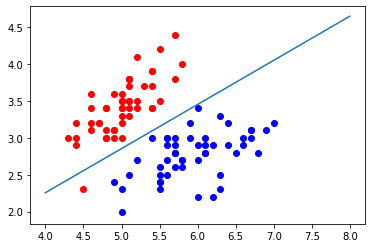

In [12]:
plt.scatter(X[y==0, 0], X[y==0, 1], color='r')
plt.scatter(X[y==1, 0], X[y==1, 1], color='b')
plt.plot(x1_plot, x2_plot)
plt.show()

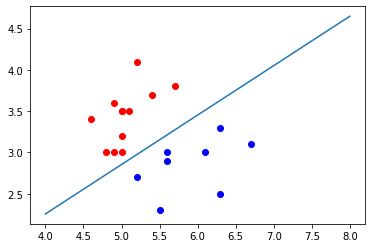

In [13]:
plt.scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], color='r')
plt.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], color='b')
plt.plot(x1_plot, x2_plot)
plt.show()

/Users/zhangxue/software/anaconda3/envs/python37/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


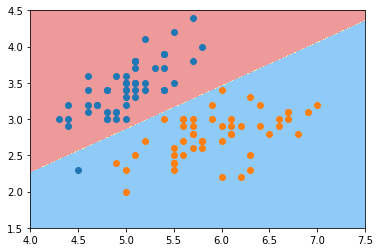

In [14]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)
    
plot_decision_boundary(log_reg, axis=[4, 7.5, 1.5, 4.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

### KNN的决策边界

In [15]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [16]:
knn_clf.score(X_test, y_test)

1.0

/Users/zhangxue/software/anaconda3/envs/python37/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


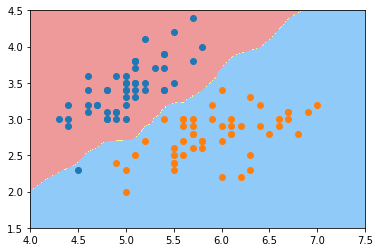

In [17]:
plot_decision_boundary(knn_clf, axis=[4, 7.5, 1.5, 4.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [18]:
knn_clf_all = KNeighborsClassifier()
knn_clf_all.fit(iris.data[:, :2], iris.target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

/Users/zhangxue/software/anaconda3/envs/python37/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


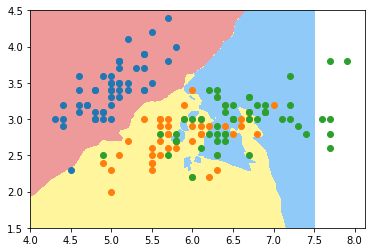

In [21]:
plot_decision_boundary(knn_clf_all, axis=[4, 7.5, 1.5, 4.5])
plt.scatter(iris.data[iris.target==0,0], iris.data[iris.target==0,1])
plt.scatter(iris.data[iris.target==1,0], iris.data[iris.target==1,1])
plt.scatter(iris.data[iris.target==2,0], iris.data[iris.target==2,1])
plt.show()

In [23]:
knn_clf_all = KNeighborsClassifier(n_neighbors=50)
knn_clf_all.fit(iris.data[:, :2], iris.target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='uniform')

/Users/zhangxue/software/anaconda3/envs/python37/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


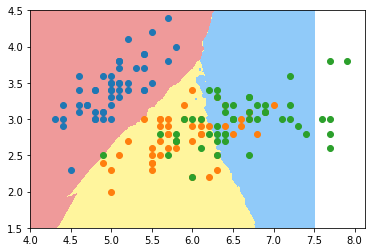

In [24]:
plot_decision_boundary(knn_clf_all, axis=[4, 7.5, 1.5, 4.5])
plt.scatter(iris.data[iris.target==0,0], iris.data[iris.target==0,1])
plt.scatter(iris.data[iris.target==1,0], iris.data[iris.target==1,1])
plt.scatter(iris.data[iris.target==2,0], iris.data[iris.target==2,1])
plt.show()